---
# Importing Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---
# Data Loading & EDA

In [111]:
df = pd.read_csv('railway.csv')

In [112]:
print("Shape of data:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData info:\n", df.info())
print("\nDescriptive statistics:\n", df.describe())

Shape of data: (31653, 18)

First 5 rows:
             Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card      NaN     Standard     Advance      3   
3    Credit Card      NaN     Standard     Advance     13   
4    Contactless      NaN     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street      2

---
# Data Preprocessing & Cleaning



---
- Data Type Conversion


In [113]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], format='%Y-%m-%d')

In [114]:
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'], format='%Y-%m-%d')

In [115]:
df['Time of Purchase'] = pd.to_datetime(df['Time of Purchase'], format='%H:%M:%S').dt.time

In [116]:
df['Departure Time'] = pd.to_datetime(df['Departure Time'], format='%H:%M:%S').dt.time

In [117]:
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], format='%H:%M:%S').dt.time

In [118]:
df['Actual Arrival Time'] = pd.to_datetime(df['Actual Arrival Time'], format='%H:%M:%S').dt.time

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  datetime64[ns]
 2   Time of Purchase     31653 non-null  object        
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             10735 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  datetime64[ns]
 12  Departure Time       31653 non-null  object        
 13  Arrival Time         31653 non-

---
- Handling Missing Values



In [120]:
df.duplicated().sum()

np.int64(0)

In [121]:
df.isna().sum()

,0
Transaction ID,0
Date of Purchase,0
Time of Purchase,0
Purchase Type,0
Payment Method,0
Railcard,20918
Ticket Class,0
Ticket Type,0
Price,0
Departure Station,0


In [122]:
missing = df['Actual Arrival Time'].isna()
df[missing]['Journey Status'].value_counts()

,count
Journey Status,
Cancelled,1880


In [123]:
df['Reason for Delay'].value_counts()

,count
Reason for Delay,
Weather,995
Technical Issue,707
Signal Failure,523
Signal failure,447
Staffing,410
Staff Shortage,399
Weather Conditions,377
Traffic,314


In [124]:
df['Reason for Delay'].fillna('No Delay', inplace=True)

In [125]:
df['Reason_for_Delay'] = df['Reason for Delay'].replace({
    'Staff Shortage': 'Staffing',
    'Weather Conditions': 'Weather',
    'Signal failure': 'Signal Failure'

})
df = df.drop(columns=['Reason for Delay'])

In [126]:
df['Railcard'] = df['Railcard'].fillna('No Railcard')

---
- Adding New Columns

In [127]:
df['Has_Railcard'] = df['Railcard'] != 'No Railcard'

In [128]:
df['Is_Delayed'] = df['Journey Status'] == 'Delayed'

In [129]:
df['Is_Cancelled'] = df['Journey Status'] == 'Cancelled'

In [130]:
df['Is_OnTime'] = df['Journey Status'] == 'On Time'

In [131]:
df['Route'] = df['Departure Station'] + " → " + df['Arrival Destination']

In [132]:
df['Day_of_Week'] = pd.to_datetime(df['Date of Journey']).dt.day_name()

In [133]:
df['Delay_Duration'] = (
    pd.to_datetime(df['Date of Journey'].astype(str) + ' ' + df['Actual Arrival Time'].astype(str), errors='coerce')
    - pd.to_datetime(df['Date of Journey'].astype(str) + ' ' + df['Arrival Time'].astype(str), errors='coerce')
).dt.total_seconds() / 60


In [134]:
df['Delay_Duration'].unique()

array([  0.,   5.,  17.,  31.,  24.,  nan,  11.,  18.,  30.,  59., 174.,
        54.,  37.,  32.,  29.,  25.,  12., 168.,  27.,  20.,  19.,  33.,
        40., 172., 113.,  45.,  14.,  16.,  48.,   4.,  56.,  65.,  77.,
         9.,  13.,  50.,  52.,  53.,  21.,   8.,  15.,  39.,  35., 138.,
        34., 155., 167.,  22.,  62., 143.,  41.,  58.,  36., 180., 105.,
        55.,  26.,  38., 152., 107.,  49.,  44.,  10.,   6.,  92.,  42.,
       136.,  57.,  51., 149., 131.,   2.,  70.,  81., 160.,   1., 151.,
         7., 158.,   3.,  43.,  80., 161.,  47., 100.,  60., 114.,  89.,
        28., 175.,  91.,  66.,  46., 134.,  69., 163.,  23., 178.,  99.,
        82., 176.,  61., 147., 129., 159.,  64., 162., 157., 179.,  73.,
       137.,  96.,  75., 156., 171., 101., 146., 144., 154., 103.,  97.,
        63., 177., 132., 165.,  88.,  98.,  67., 173., 170., 125., 141.,
        85., 169.])

In [135]:
df['Month'] = pd.to_datetime(df['Date of Journey']).dt.strftime('%B')

In [136]:
df['Hour_AM_PM'] = pd.to_datetime(df['Departure Time'], format='%H:%M:%S').dt.strftime('%I %p')

In [137]:
df['Hour_Minute'] = pd.to_datetime(df['Departure Time'], format='%H:%M:%S').dt.strftime('%I:%M %p')

In [138]:
df.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Refund Request',
       'Reason_for_Delay', 'Has_Railcard', 'Is_Delayed', 'Is_Cancelled',
       'Is_OnTime', 'Route', 'Day_of_Week', 'Delay_Duration', 'Month',
       'Hour_AM_PM', 'Hour_Minute'],
      dtype='object')

---
# 1 Identify the most popular routes

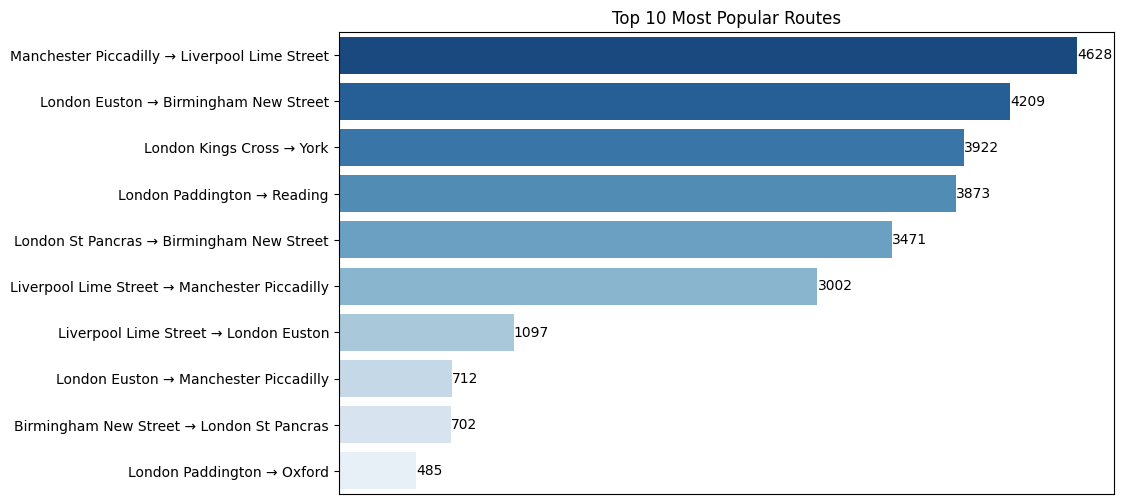

In [139]:
popular_routes = df['Route'].value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=popular_routes.values, y=popular_routes.index, palette="Blues_r")

for i, v in enumerate(popular_routes.values):
    ax.text(v, i, str(v), color='black', va='center')

plt.title("Top 10 Most Popular Routes")
plt.ylabel("")
ax.set_xticks([])
plt.show()

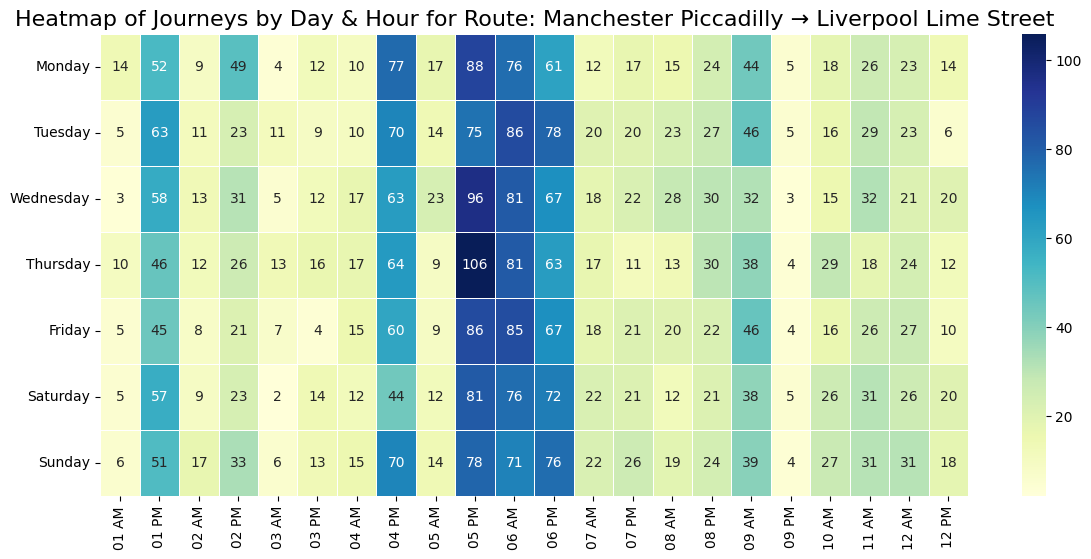

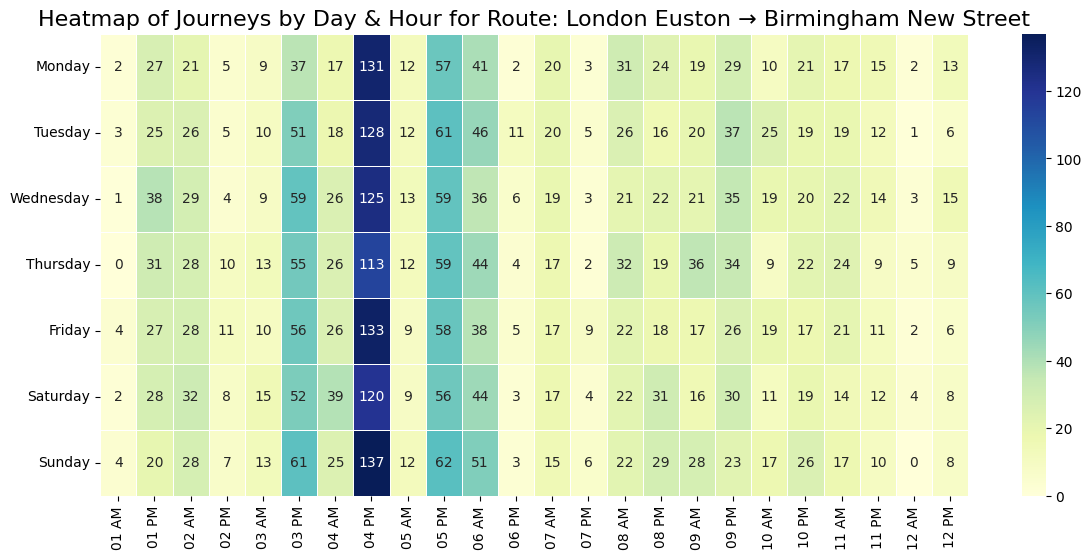

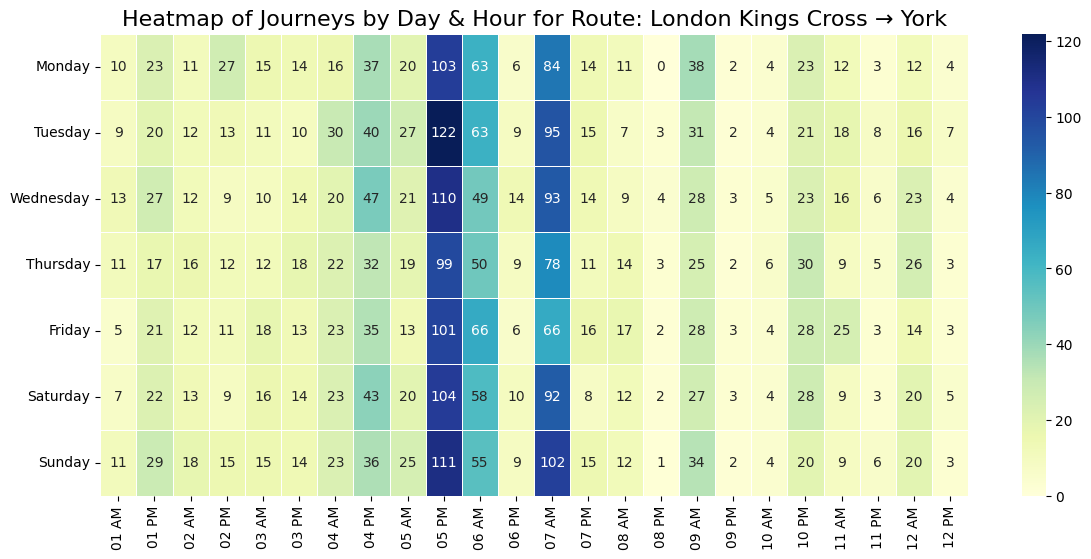

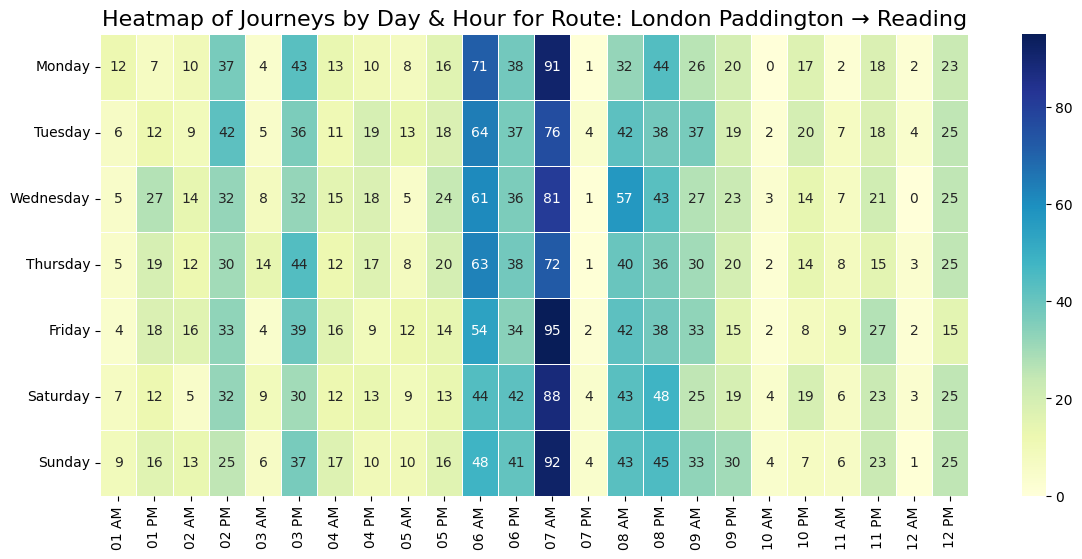

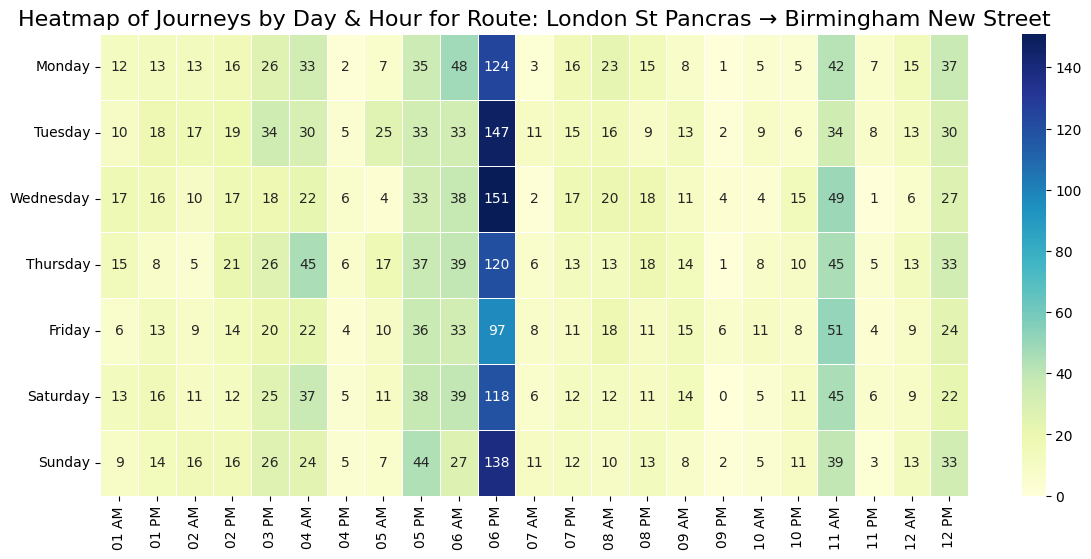

In [140]:
# Pivot Table (Route × Hour_of_Departure)
routes_pivot = df.groupby(['Route','Day_of_Week','Hour_AM_PM']).size().unstack(fill_value=0)

days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
routes_pivot = routes_pivot.reindex(columns=range(0,24))  # الأعمدة = الساعات 0-23

top_routes = df['Route'].value_counts().head(5).index
top_routes_pivot = routes_pivot.loc[top_routes]

for route in top_routes:
    pivot_route = df[df['Route']==route].groupby(['Day_of_Week','Hour_AM_PM']).size().unstack(fill_value=0)
    pivot_route = pivot_route.reindex(days_order)

    plt.figure(figsize=(14,6))
    sns.heatmap(pivot_route, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
    plt.title(f"Heatmap of Journeys by Day & Hour for Route: {route}", fontsize=16)
    plt.xlabel("")
    plt.ylabel("")
    plt.show()

---
# 2 Determine peak travel times



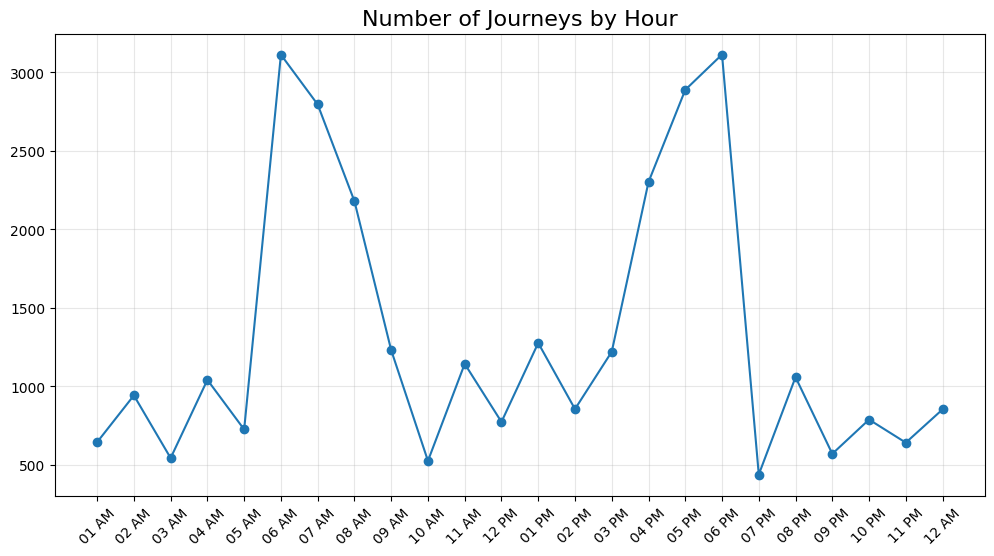

In [141]:
hour_ampm_counts = df.groupby("Hour_AM_PM").size().reset_index(name="Journeys")

hour_order = [
    f"{h:02d} AM" for h in range(1, 12)
] + ["12 PM"] + [f"{h:02d} PM" for h in range(1, 12)] + ["12 AM"]

hour_ampm_counts["Hour_AM_PM"] = pd.Categorical(
    hour_ampm_counts["Hour_AM_PM"], categories=hour_order, ordered=True
)

hour_ampm_counts = hour_ampm_counts.sort_values("Hour_AM_PM")

plt.figure(figsize=(12,6))
plt.plot(hour_ampm_counts["Hour_AM_PM"], hour_ampm_counts["Journeys"], marker="o")

plt.title("Number of Journeys by Hour", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

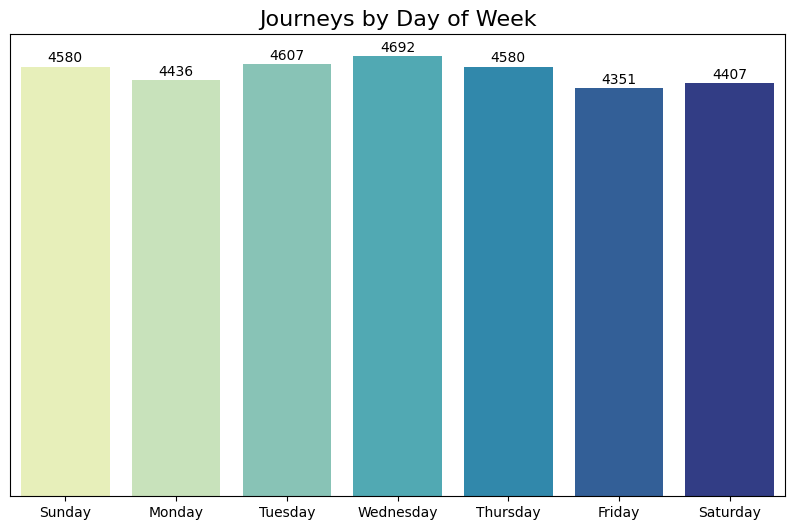

In [142]:
day_counts = df['Day_of_Week'].value_counts().reindex(
    ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette="YlGnBu")

for i, v in enumerate(day_counts.values):
    plt.text(i, v + max(day_counts.values)*0.01, str(v), ha='center', fontsize=10)

plt.title("Journeys by Day of Week", fontsize=16)
plt.xlabel("")
plt.ylabel("")
ax.set_yticks([])
plt.show()

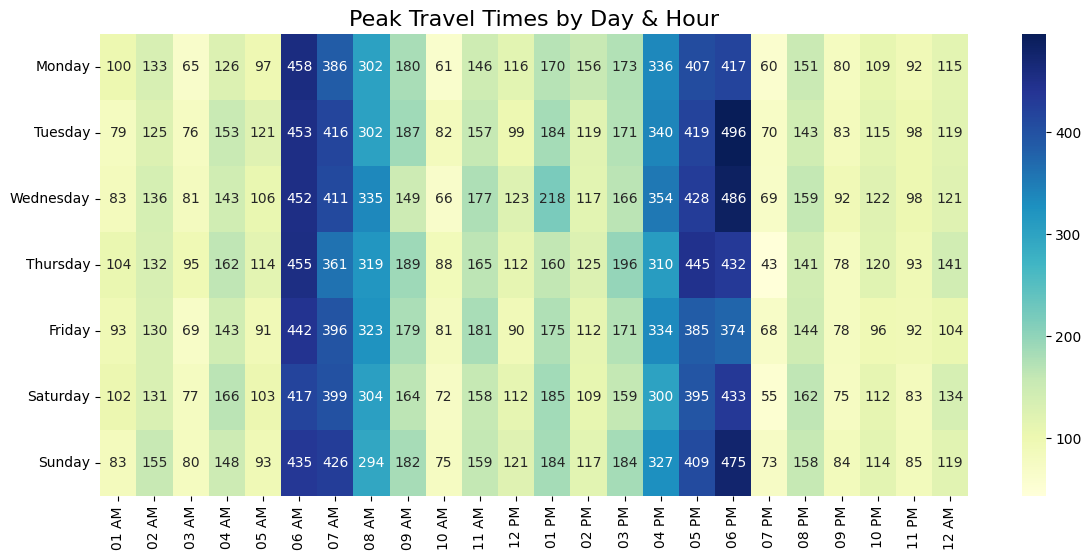

In [143]:
pivot_day_hour = df.groupby(['Day_of_Week','Hour_AM_PM']).size().unstack(fill_value=0)

days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot_day_hour = pivot_day_hour.reindex(days_order)

hour_order = (
    [f"{h:02d} AM" for h in range(1, 12)] +
    ["12 PM"] +
    [f"{h:02d} PM" for h in range(1, 12)] +
    ["12 AM"]
)
pivot_day_hour = pivot_day_hour[hour_order]

plt.figure(figsize=(14,6))
sns.heatmap(pivot_day_hour, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Peak Travel Times by Day & Hour", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()


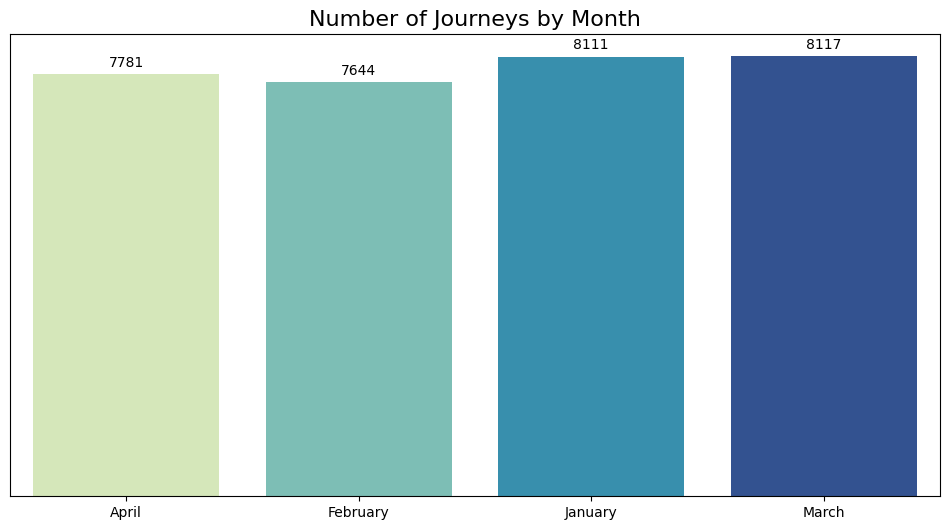

In [144]:
monthly_counts = df.groupby("Month").size().sort_index().reset_index(name="Journeys")

plt.figure(figsize=(12,6))
sns.barplot(data=monthly_counts, x="Month", y="Journeys", palette="YlGnBu")

for index, row in monthly_counts.iterrows():
    plt.text(x=index, y=row['Journeys'] + max(monthly_counts['Journeys'])*0.01,
             s=row['Journeys'], ha='center', va='bottom', fontsize=10)

plt.title("Number of Journeys by Month", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.show()

---
# 3 Analyze revenue from different ticket types & classes

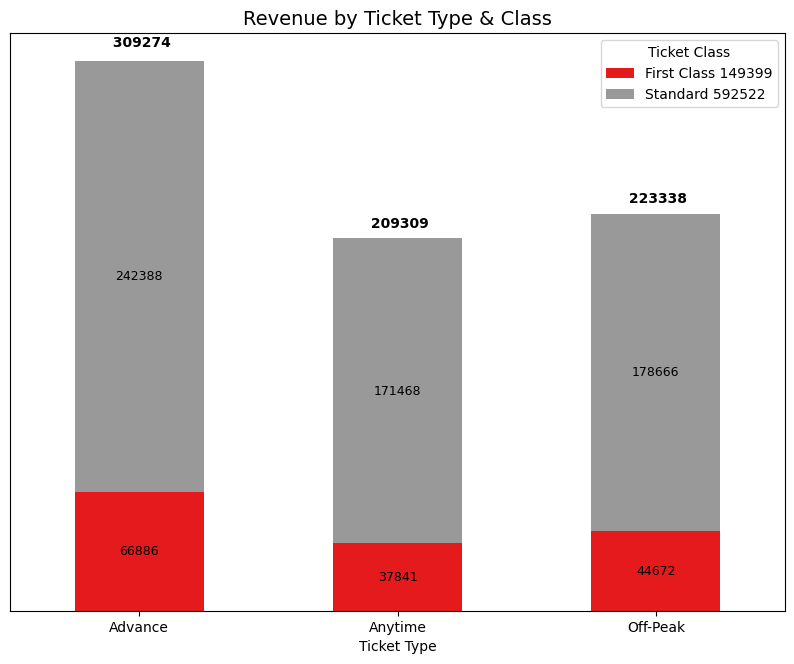

In [145]:
revenue_pivot = df.pivot_table(
    index='Ticket Type',
    columns='Ticket Class',
    values='Price',
    aggfunc='sum'
).fillna(0)

class_totals = revenue_pivot.sum(axis=0)
type_totals = revenue_pivot.sum(axis=1)

ax = revenue_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10,7.5),
    colormap= 'Set1'
)

for i, ticket_type in enumerate(revenue_pivot.index):
    bottom = 0
    for cls in revenue_pivot.columns:
        height = revenue_pivot.loc[ticket_type, cls]
        if height > 0:
            ax.text(i, bottom + height/2, f'{int(height)}',
                    ha='center', va='center', fontsize=9, color='black')
            bottom += height

for i, total in enumerate(type_totals):
    ax.text(i, total + (total*0.02), f' {int(total)}',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

ax.set_yticklabels([])
ax.set_yticks([])

plt.title("Revenue by Ticket Type & Class", fontsize=14)
plt.xlabel("Ticket Type")
plt.xticks(rotation=0)

handles, labels = ax.get_legend_handles_labels()
new_labels = [f"{cls} {int(class_totals[cls])}" for cls in revenue_pivot.columns]
ax.legend(handles, new_labels, title="Ticket Class")

plt.show()

---
# 4 Diagnose on-time performance and contributing factors


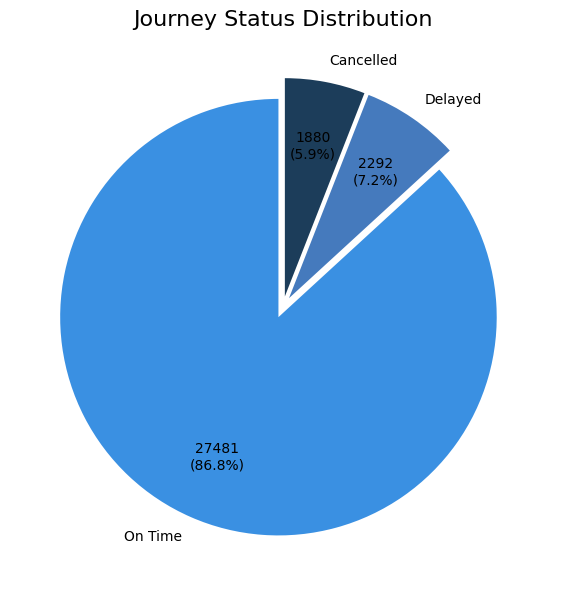

In [146]:
labels = ["On Time", "Delayed", "Cancelled"]

status_counts = df[['Is_OnTime','Is_Delayed','Is_Cancelled']].sum()

def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}\n({pct:.1f}%)"

explode = (0.05, 0.05, 0.05)

plt.figure(figsize=(6,6))
plt.pie(
    status_counts,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, status_counts),
    startangle=90,
    colors=["#3A90E2", "#457ABD", "#1C3D5A"],
    explode=explode,
    labeldistance=1.1,
    pctdistance=0.7
)

plt.title("Journey Status Distribution", fontsize=16)
plt.tight_layout()
plt.show()

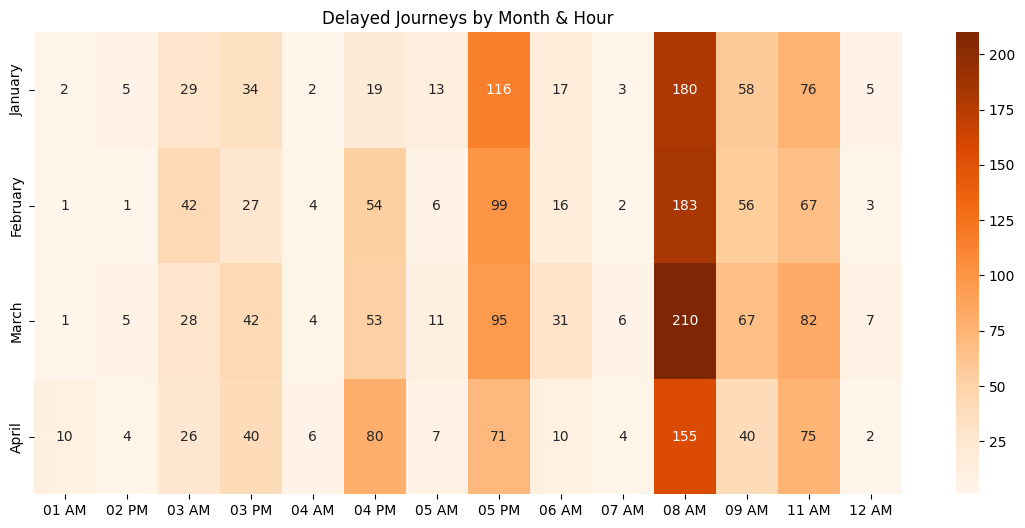

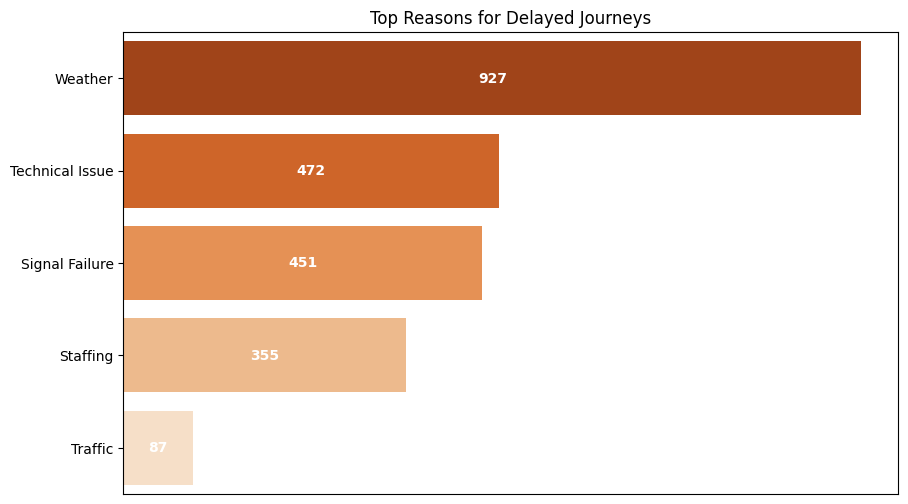

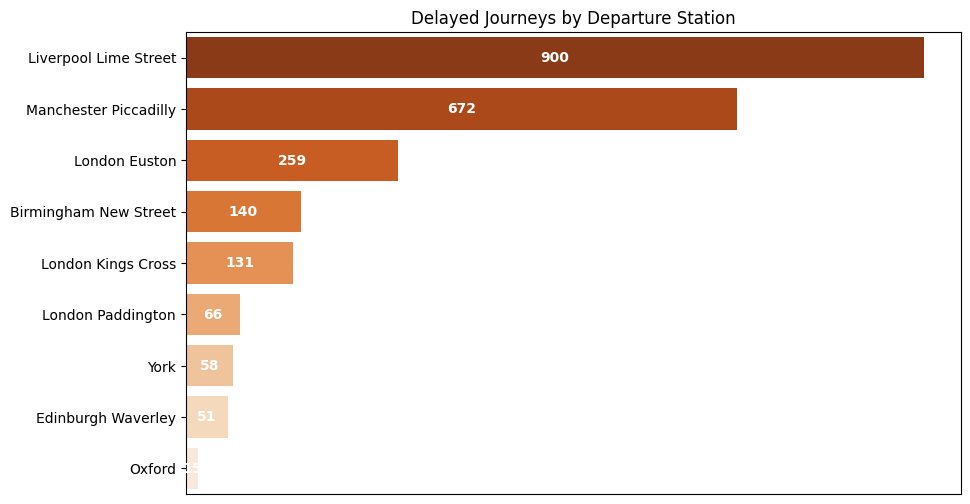

In [147]:
delayed = df[df['Is_Delayed'] == True].copy()

delayed = df[df['Is_Delayed']]
heat_delay = delayed.pivot_table(
    index='Month',
    columns='Hour_AM_PM',
    values='Transaction ID',
    aggfunc='count'
).reindex([
    'January','February','March','April']).fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(heat_delay, cmap="Oranges", annot=True, fmt=".0f")
plt.title("Delayed Journeys by Month & Hour")
plt.xlabel("")
plt.ylabel("")
plt.show()

delayed_reasons = delayed['Reason_for_Delay'].value_counts()
plt.figure(figsize=(10,6))
ax = sns.barplot(x=delayed_reasons.values, y=delayed_reasons.index, palette="Oranges_r")

for i, v in enumerate(delayed_reasons.values):
    ax.text(v/2, i, str(v), color='white', va='center', ha='center', fontweight='bold')

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks([])
plt.title("Top Reasons for Delayed Journeys")
plt.show()

station_delay = delayed['Departure Station'].value_counts()
plt.figure(figsize=(10,6))
ax2 = sns.barplot(x=station_delay.values, y=station_delay.index, palette="Oranges_r")

for i, v in enumerate(station_delay.values):
    ax2.text(v/2, i, str(v), color='white', va='center', ha='center', fontweight='bold')

ax2.set_xlabel("")
ax2.set_ylabel("")
plt.xticks([])
plt.title("Delayed Journeys by Departure Station")
plt.show()

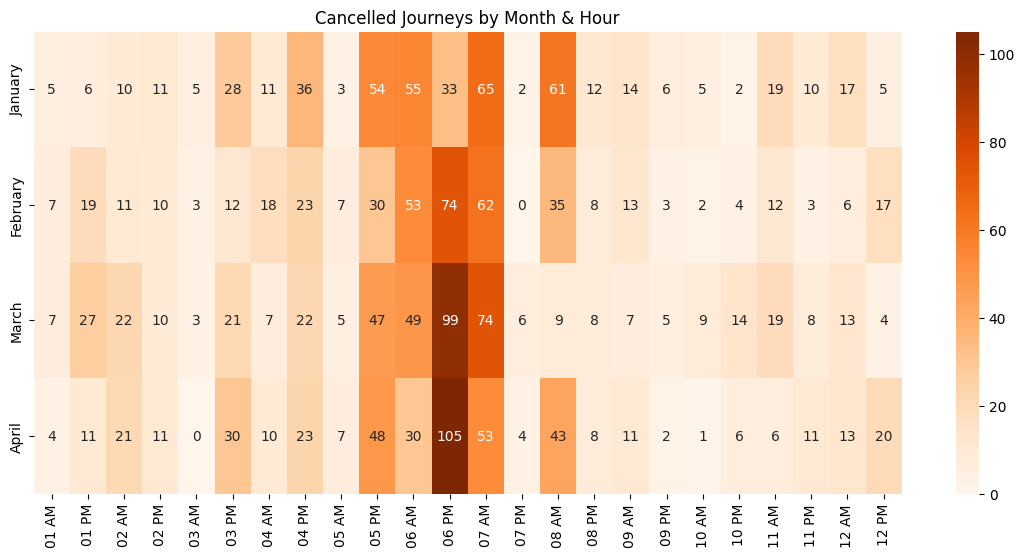

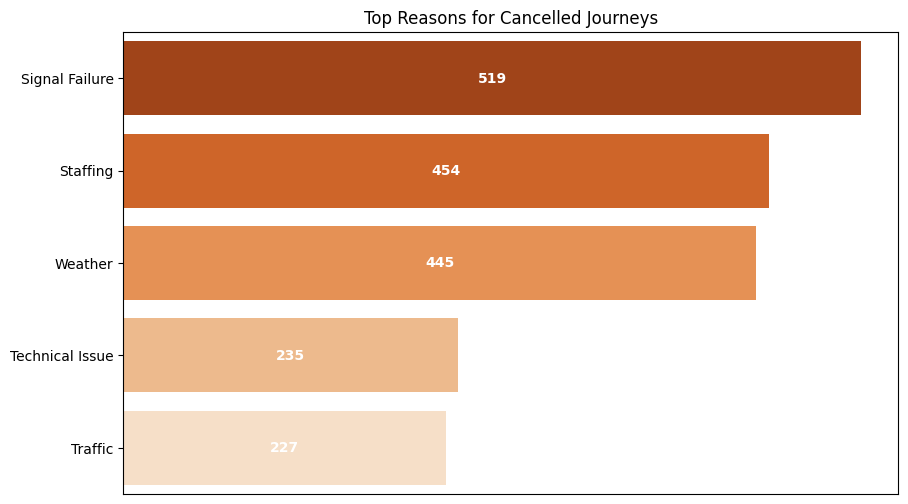

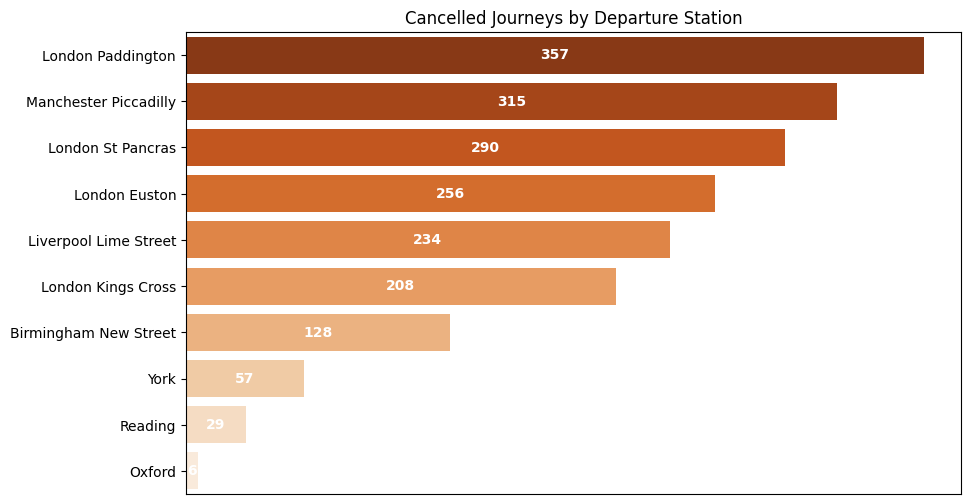

In [148]:
cancelled = df[df['Is_Cancelled'] == True].copy()

delayed = df[df['Is_Cancelled']]
heat_delay = delayed.pivot_table(
    index='Month',
    columns='Hour_AM_PM',
    values='Transaction ID',
    aggfunc='count'
).reindex([
    'January','February','March','April']).fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(heat_delay, cmap="Oranges", annot=True, fmt=".0f")
plt.title("Cancelled Journeys by Month & Hour")
plt.xlabel("")
plt.ylabel("")
plt.show()

cancel_reasons = cancelled['Reason_for_Delay'].value_counts()
plt.figure(figsize=(10,6))
ax = sns.barplot(x=cancel_reasons.values, y=cancel_reasons.index, palette="Oranges_r")

for i, v in enumerate(cancel_reasons.values):
    ax.text(v/2, i, str(v), color='white', va='center', ha='center', fontweight='bold')

ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks([])
plt.title("Top Reasons for Cancelled Journeys")
plt.show()

station_cancel = cancelled['Departure Station'].value_counts()
plt.figure(figsize=(10,6))
ax2 = sns.barplot(x=station_cancel.values, y=station_cancel.index, palette="Oranges_r")

for i, v in enumerate(station_cancel.values):
    ax2.text(v/2, i, str(v), color='white', va='center', ha='center', fontweight='bold')

ax2.set_xlabel("")
ax2.set_ylabel("")
plt.xticks([])
plt.title("Cancelled Journeys by Departure Station")
plt.show()

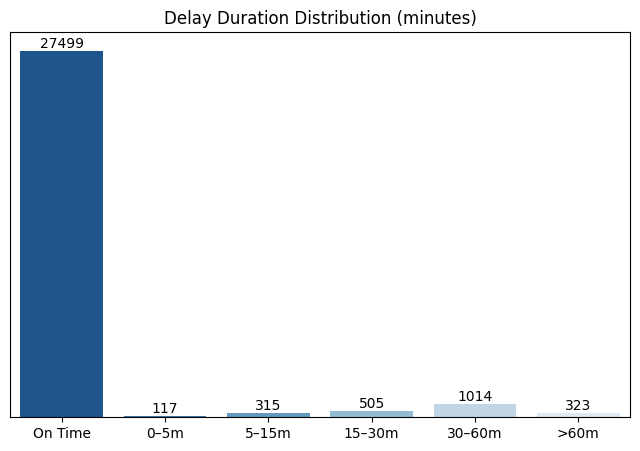

In [149]:
delay_clean = df['Delay_Duration'].dropna()
bins = [-0.001, 0, 5, 15, 30, 60, np.inf]
labels = ["On Time", "0–5m", "5–15m", "15–30m", "30–60m", ">60m"]

df['Delay_Category'] = pd.cut(delay_clean, bins=bins, labels=labels)

delay_counts = df['Delay_Category'].value_counts().reindex(labels)

plt.figure(figsize=(8,5))
sns.barplot(x=delay_counts.index, y=delay_counts.values, palette="Blues_r")

plt.title("Delay Duration Distribution (minutes)")
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

for i, v in enumerate(delay_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

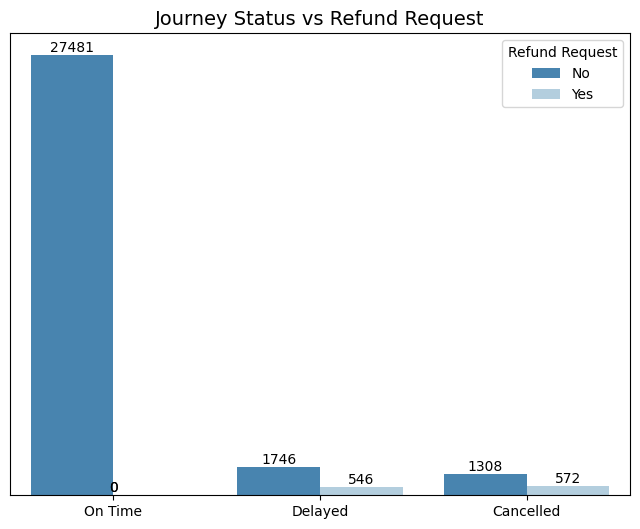

In [150]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='Journey Status', hue='Refund Request', palette="Blues_r")

plt.title("Journey Status vs Refund Request", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.legend(title="Refund Request")
plt.show()

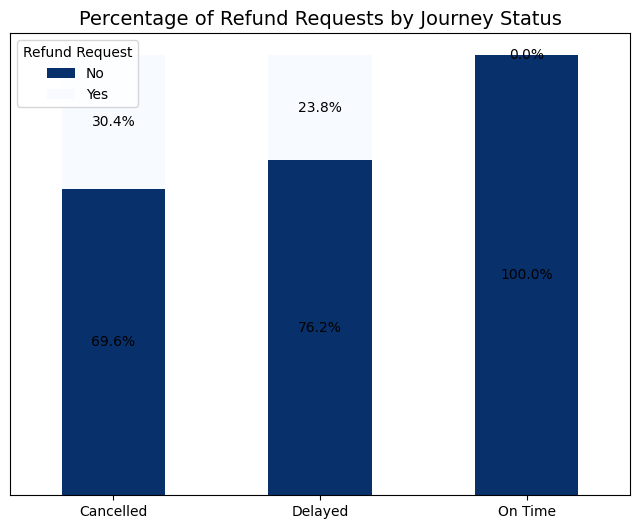

In [151]:
status_refund = pd.crosstab(df['Journey Status'], df['Refund Request'])
status_refund_perc = status_refund.div(status_refund.sum(axis=1), axis=0) * 100

status_refund_perc.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Blues_r')

plt.title("Percentage of Refund Requests by Journey Status", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(rotation=0)

for i, status in enumerate(status_refund_perc.index):
    bottom = 0
    for j, col in enumerate(status_refund_perc.columns):
        val = status_refund_perc.loc[status, col]
        plt.text(i, bottom + val/2, f"{val:.1f}%", ha='center', va='center', fontsize=10)
        bottom += val

plt.legend(title="Refund Request")
plt.show()

---
# Export Cleaned Data to CSV

In [152]:
#df.to_csv('railway_cleaned.csv', index=False)

---